In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows',None) # to display all rows & dots will remove
pd.set_option('display.max_columns',None) # to display all rows & dots will remove

In [3]:
df = pd.read_csv(r'C:\Users\HP\Desktop\Evaluation Project Phase - Week 3 - (19-02)\Telecom_customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
# Data Cleaning

In [5]:
df.drop({'customerID','gender'},axis=1,inplace=True)

In [6]:
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()
df['Partner']=LE.fit_transform(df['Partner'])
df['Dependents']=LE.fit_transform(df['Dependents'])
df['PhoneService']=LE.fit_transform(df['PhoneService'])
df['MultipleLines']=LE.fit_transform(df['MultipleLines'])
df['InternetService']=LE.fit_transform(df['InternetService'])
df['OnlineSecurity']=LE.fit_transform(df['OnlineSecurity'])
df['OnlineBackup']=LE.fit_transform(df['OnlineBackup'])
df['DeviceProtection']=LE.fit_transform(df['DeviceProtection'])
df['TechSupport']=LE.fit_transform(df['TechSupport'])
df['StreamingTV']=LE.fit_transform(df['StreamingTV'])
df['StreamingMovies']=LE.fit_transform(df['StreamingMovies'])
df['Contract']=LE.fit_transform(df['Contract'])
df['PaperlessBilling']=LE.fit_transform(df['PaperlessBilling'])
df['PaymentMethod']=LE.fit_transform(df['PaymentMethod'])
df['Churn']=LE.fit_transform(df['Churn'])

In [7]:
df["TotalCharges"]= df["TotalCharges"].replace(' ',25.35)

In [8]:
df.head()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.5,0
2,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7043 non-null   int64  
 1   Partner           7043 non-null   int32  
 2   Dependents        7043 non-null   int32  
 3   tenure            7043 non-null   int64  
 4   PhoneService      7043 non-null   int32  
 5   MultipleLines     7043 non-null   int32  
 6   InternetService   7043 non-null   int32  
 7   OnlineSecurity    7043 non-null   int32  
 8   OnlineBackup      7043 non-null   int32  
 9   DeviceProtection  7043 non-null   int32  
 10  TechSupport       7043 non-null   int32  
 11  StreamingTV       7043 non-null   int32  
 12  StreamingMovies   7043 non-null   int32  
 13  Contract          7043 non-null   int32  
 14  PaperlessBilling  7043 non-null   int32  
 15  PaymentMethod     7043 non-null   int32  
 16  MonthlyCharges    7043 non-null   float64


In [10]:
df.isnull().sum()

SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [12]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,64.761692,0.265370
std,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,30.090047,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,35.500000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,70.350000,0.000000
75%,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,89.850000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,118.750000,1.000000


In [11]:
df.corr()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,Churn
SeniorCitizen,1.000000,0.016479,-0.211185,0.016567,0.008576,0.146185,-0.032310,-0.128221,-0.013632,-0.021398,-0.151268,0.030776,0.047266,-0.142554,0.156530,-0.038551,0.220173,0.150889
Partner,0.016479,1.000000,0.452676,0.379697,0.017706,0.142410,0.000891,0.150828,0.153130,0.166330,0.126733,0.137341,0.129574,0.294806,-0.014877,-0.154798,0.096848,-0.150448
Dependents,-0.211185,0.452676,1.000000,0.159712,-0.001762,-0.024991,0.044590,0.152166,0.091015,0.080537,0.133524,0.046885,0.021321,0.243187,-0.111377,-0.040292,-0.113890,-0.164221
tenure,0.016567,0.379697,0.159712,1.000000,0.008448,0.343032,-0.030359,0.325468,0.370876,0.371105,0.322942,0.289373,0.296866,0.671607,0.006152,-0.370436,0.247900,-0.352229
PhoneService,0.008576,0.017706,-0.001762,0.008448,1.000000,-0.020538,0.387436,-0.015198,0.024105,0.003727,-0.019158,0.055353,0.043870,0.002247,0.016505,-0.004184,0.247398,0.011942
MultipleLines,0.146185,0.142410,-0.024991,0.343032,-0.020538,1.000000,-0.109216,0.007141,0.117327,0.122318,0.011466,0.175059,0.180957,0.110842,0.165146,-0.176793,0.433576,0.038037
InternetService,-0.032310,0.000891,0.044590,-0.030359,0.387436,-0.109216,1.000000,-0.028416,0.036138,0.044944,-0.026047,0.107417,0.098350,0.099721,-0.138625,0.086140,-0.323260,-0.047291
OnlineSecurity,-0.128221,0.150828,0.152166,0.325468,-0.015198,0.007141,-0.028416,1.000000,0.185126,0.175985,0.285028,0.044669,0.055954,0.374416,-0.157641,-0.096726,-0.053878,-0.289309
OnlineBackup,-0.013632,0.153130,0.091015,0.370876,0.024105,0.117327,0.036138,0.185126,1.000000,0.187757,0.195748,0.147186,0.136722,0.280980,-0.013370,-0.124847,0.119777,-0.195525
DeviceProtection,-0.021398,0.166330,0.080537,0.371105,0.003727,0.122318,0.044944,0.175985,0.187757,1.000000,0.240593,0.276652,0.288799,0.350277,-0.038234,-0.135750,0.163652,-0.178134


In [13]:
 # Visualization

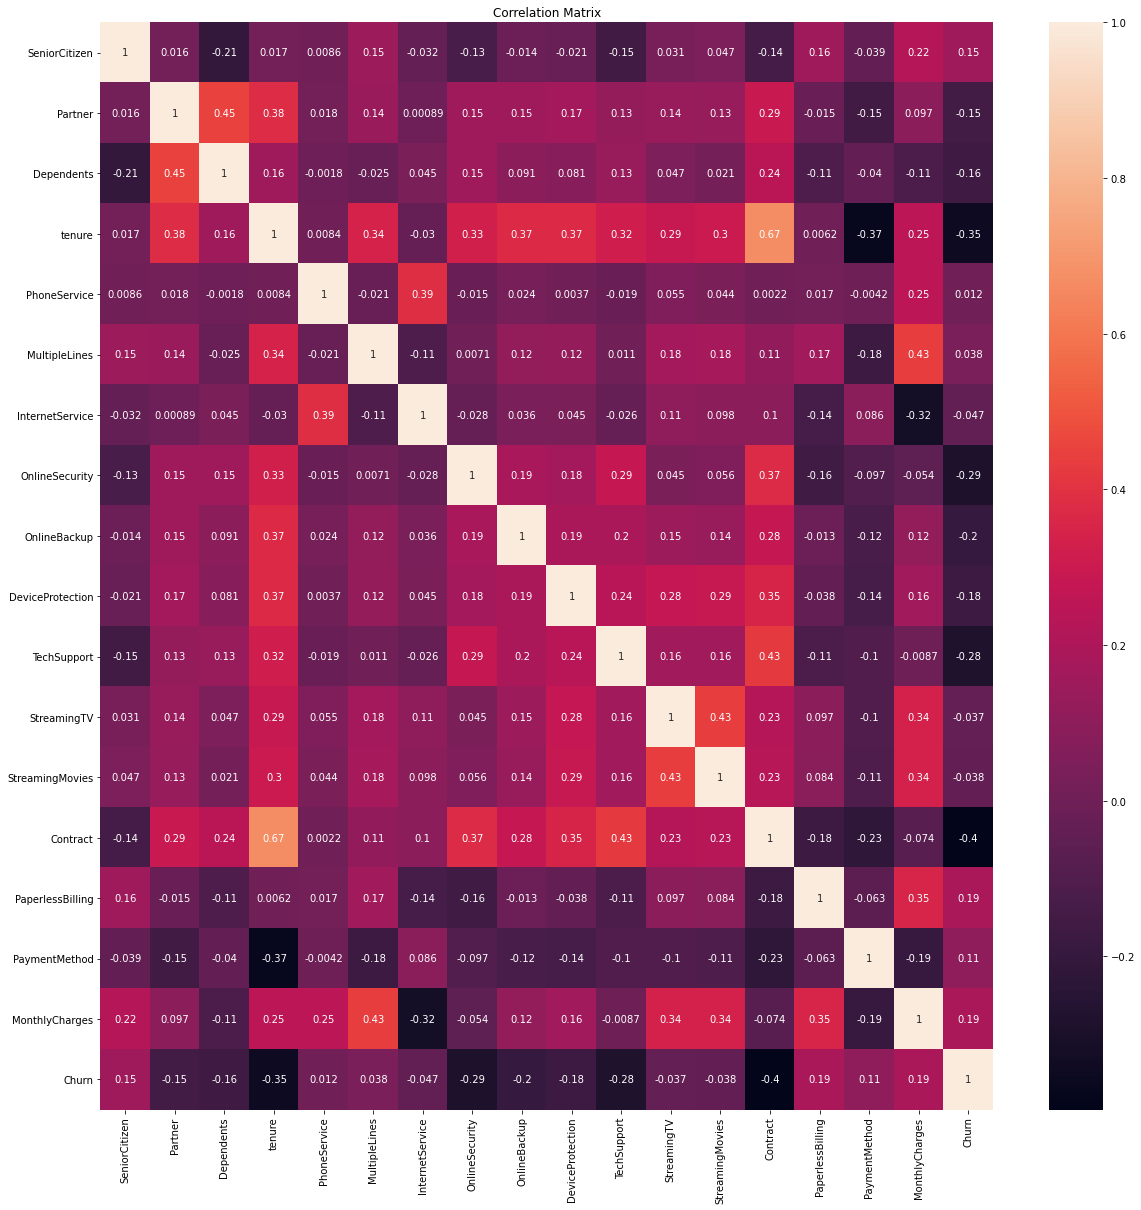

In [14]:
corr_mat=df.corr()
# Size of the canvas
plt.figure(figsize=[20,20])
#Plot Correlation Matrix
sns.heatmap(corr_mat,annot=True) # annot represnts each value encoded in heatmap
plt.title('Correlation Matrix')
plt.show()

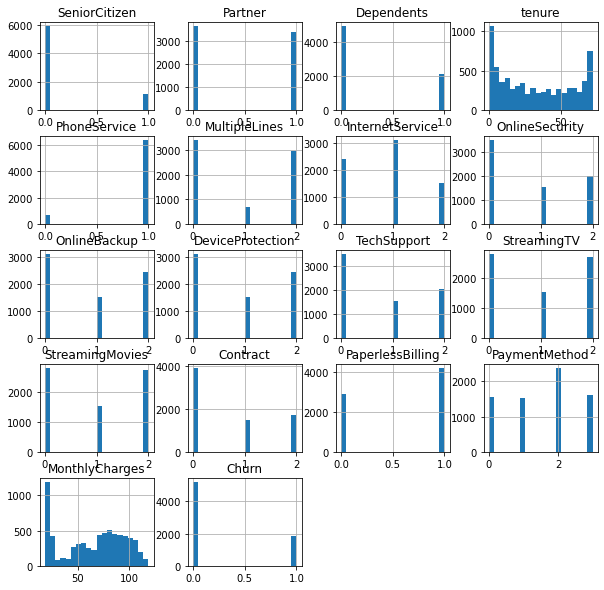

In [15]:
df.hist(bins=20,figsize=(10,10))
plt.show()

In [16]:
# EDA

In [17]:
x=df.drop('Churn',axis=1)
y=df['Churn']

In [18]:
x.skew().sort_values()

PhoneService       -2.727153
PaperlessBilling   -0.375396
MonthlyCharges     -0.220524
PaymentMethod      -0.170129
StreamingMovies     0.014657
StreamingTV         0.028486
Partner             0.067922
MultipleLines       0.118719
OnlineBackup        0.182930
DeviceProtection    0.186847
InternetService     0.205423
tenure              0.239540
TechSupport         0.402365
OnlineSecurity      0.416985
Contract            0.630959
Dependents          0.875199
TotalCharges        0.963285
SeniorCitizen       1.833633
dtype: float64

In [19]:
from sklearn.preprocessing import power_transform
x_new=power_transform(x)
x=pd.DataFrame(x_new,columns=x.columns)

In [20]:
x.skew().sort_values(ascending=False)

SeniorCitizen       1.833633
Dependents          0.875199
Contract            0.302174
OnlineSecurity      0.149362
TechSupport         0.139751
Partner             0.067922
MultipleLines       0.033697
DeviceProtection    0.001051
OnlineBackup       -0.001417
InternetService    -0.072384
StreamingTV        -0.097211
StreamingMovies    -0.105641
TotalCharges       -0.145288
PaymentMethod      -0.207559
tenure             -0.243325
MonthlyCharges     -0.259035
PaperlessBilling   -0.375396
PhoneService       -2.727153
dtype: float64

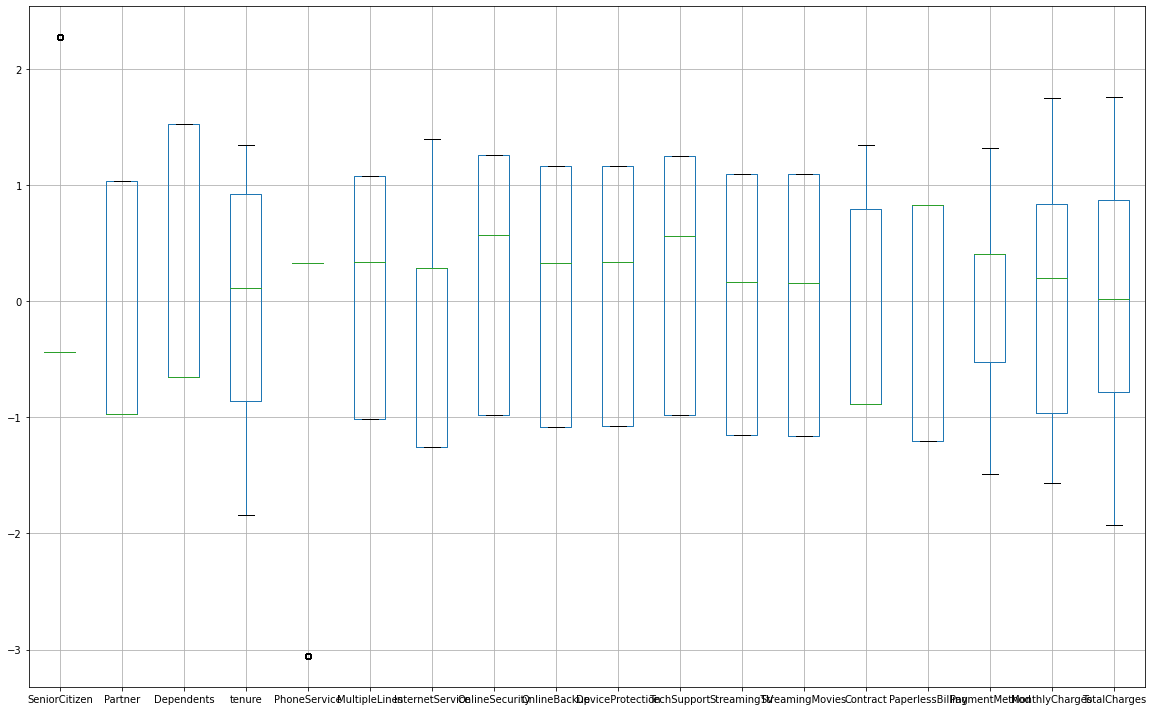

In [21]:
x.boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [22]:
# Model Building

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
maxAccu=0 # max accuracy
maxRS=0 # best random state value for which max accuracy is achieved
for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=i)
    LR=LogisticRegression()
    LR.fit(x_train,y_train) # Fitting the data will train the model
    predrf=LR.predict(x_test) # Predicting the data # Predicted traget variable
    acc=accuracy_score(y_test,predrf) # two target varaible # accuracy score
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is ",maxAccu,"on Randon_state ",maxRS)

Best accuracy is  0.8289567068843151 on Randon_state  35


In [24]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=35)

In [25]:
from sklearn.linear_model import LogisticRegression
LR=LogisticRegression()
LR.fit(x_train,y_train)
predlr=LR.predict(x_test)
print("Accuracy",accuracy_score(y_test,predlr)*100)
print(confusion_matrix(y_test,predlr))
print(classification_report(y_test,predlr))

Accuracy 82.89567068843151
[[977  85]
 [156 191]]
              precision    recall  f1-score   support

           0       0.86      0.92      0.89      1062
           1       0.69      0.55      0.61       347

    accuracy                           0.83      1409
   macro avg       0.78      0.74      0.75      1409
weighted avg       0.82      0.83      0.82      1409



In [26]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt=dt.predict(x_test)
print("Accuracy",accuracy_score(y_test,preddt)*100)
print(confusion_matrix(y_test,preddt))
print(classification_report(y_test,preddt))

Accuracy 75.8694109297374
[[889 173]
 [167 180]]
              precision    recall  f1-score   support

           0       0.84      0.84      0.84      1062
           1       0.51      0.52      0.51       347

    accuracy                           0.76      1409
   macro avg       0.68      0.68      0.68      1409
weighted avg       0.76      0.76      0.76      1409



In [27]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
print("Accuracy",accuracy_score(y_test,predrf)*100)
print(confusion_matrix(y_test,predrf))
print(classification_report(y_test,predrf))

Accuracy 81.33427963094393
[[978  84]
 [179 168]]
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      1062
           1       0.67      0.48      0.56       347

    accuracy                           0.81      1409
   macro avg       0.76      0.70      0.72      1409
weighted avg       0.80      0.81      0.80      1409



In [28]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(x_train,y_train)
ad_pred=svc.predict(x_test)
print("Accuracy",accuracy_score(y_test,ad_pred)*100)
print(confusion_matrix(y_test,ad_pred))
print(classification_report(y_test,ad_pred))

Accuracy 82.39886444286728
[[991  71]
 [177 170]]
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      1062
           1       0.71      0.49      0.58       347

    accuracy                           0.82      1409
   macro avg       0.78      0.71      0.73      1409
weighted avg       0.81      0.82      0.81      1409



In [29]:
# Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
scr=cross_val_score(LR,x,y,cv=5)
print("Cross Validation Score Of Logistic Regression Model :",scr.mean())
scr1=cross_val_score(dt,x,y,cv=5)
print("Cross Validation Score Of Decision Tree Model :",scr.mean())
scr2=cross_val_score(rf,x,y,cv=5)
print("Cross Validation Score Of Random Forest Model :",scr2.mean())
scr3=cross_val_score(svc,x,y,cv=5)
print("Cross Validation Score Of SVC Model :",scr3.mean())

Cross Validation Score Of Logistic Regression Model : 0.8064748128911543
Cross Validation Score Of Decision Tree Model : 0.8064748128911543
Cross Validation Score Of Random Forest Model : 0.7897219175430672
Cross Validation Score Of SVC Model : 0.7998032131105233


In [31]:
# Hyperparameter Tuning

In [32]:
from sklearn.model_selection import GridSearchCV
# Create parameters list to pass in GridSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train) # fitting the data in model
GCV.best_params_ # Printing the best parameter found by GridSearchCV
GCV_pred=GCV.best_estimator_.predict(x_test) # predicting with best parameters
accuracy_score(y_test,GCV_pred) # checking final accuracy

0.8246983676366217

In [33]:
# ROC AUC Curve

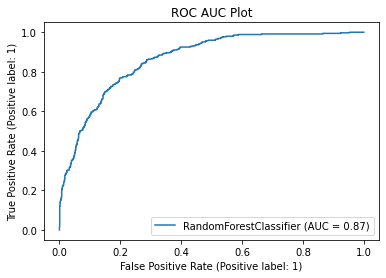

In [34]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC Plot")
plt.show()

In [35]:
# Final Accuracy is 82% and Auc score is %87

In [36]:
# Conclusion

In [37]:
a=np.array(y_test)
predicted=np.array(LR.predict(x_test))
Churn=pd.DataFrame({'Original_Data':a,'Predicted_Data':predicted},index=range(len(a)))
Churn

,Original_Data,Predicted_Data
0,0,0
1,0,0
2,0,0
3,0,0
4,1,1
5,1,0
6,1,1
7,0,1
8,0,0
9,1,0


In [38]:
# Model Saving
import pickle
filename = 'Customer Churn Analysis.pkl'
pickle.dump(LR,open(filename,'wb'))

# Thanks...!!!